In [1]:
# The first step will be importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

In [2]:
# the second step is to load the dataset
iris = load_iris()
a=iris.data[:,:] 
b=iris.target

In [4]:
# Visualizing the data
data=pd.DataFrame(iris['data'],columns=["Petal_Length","Petal_Width","Sepal_Length","Sepal_Width"])
data.head()

,Petal_Length,Petal_Width,Sepal_Length,Sepal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data=pd.DataFrame(iris['data'],columns=["Petal_Length","Petal_Width","Sepal_Length","Sepal_Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

In [6]:
data.head()

,Petal_Length,Petal_Width,Sepal_Length,Sepal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
data.describe()

,Petal_Length,Petal_Width,Sepal_Length,Sepal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


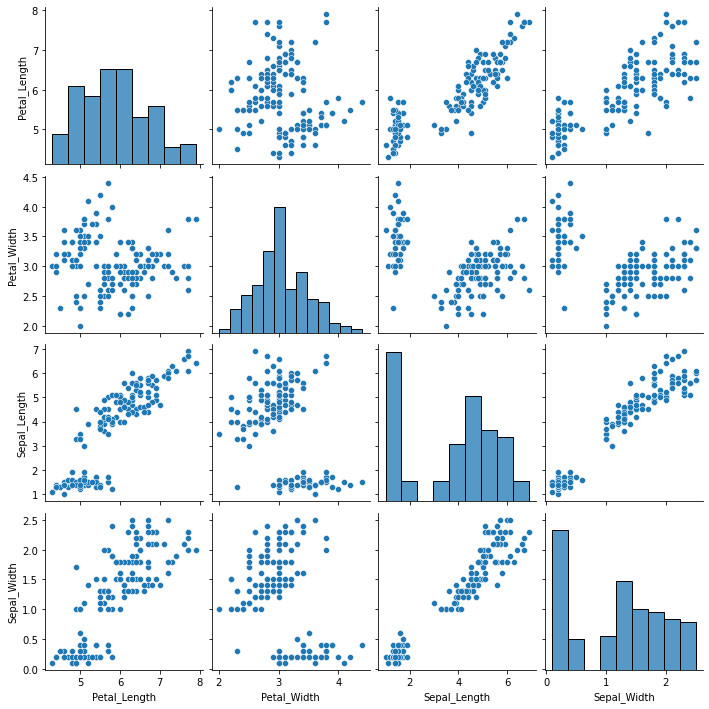

In [8]:
# using seaborn to visualize data.
# seaborn is a data visualization library in Python to visualize the data graphically.
sns.pairplot(data)

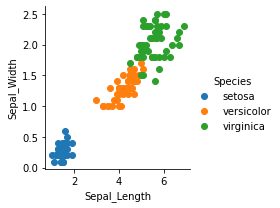

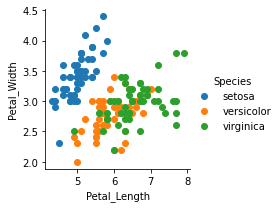

In [9]:
# we will now use scatter plot to observe relationship between length and width of sepal and petal.

# Scatter plot of data on Sepal features(Length,Width)
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal_Length','Sepal_Width').add_legend()
plt.show()

# Scatter plot of data on Petal features(Length,Width)
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal_Length','Petal_Width').add_legend()
plt.show()

In [10]:
# creating and training the model
# we will keep the test size as 0.2. i.e 20% of our dataset is used to check whether our model is well trained and can it predict efficiently?
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
y_pred = tree_classifier.predict(X_test)

In [11]:
# we have trained the Model

In [12]:
# now comparing the original and the predicted classification
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred} )
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


In [13]:
# Predicting the class output for some random values of petal and sepal length and width

print("Class Names = ",iris.target_names)
print()
print("Estimating Class Probabilities for flower whose petals length width are 5.7cm and 3cm and sepal length and width are 4.2cm and 1.2cm. ")
print()
print('Output = ',tree_classifier.predict([[5.7, 3, 4.2, 1.2]]))
print()

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 5.7cm and 3cm and sepal length and width are 4.2cm and 1.2cm. 

Output =  [1]



In [14]:
# it correctly predicts the class as 1 which is versicolor
# now we will try for virginica whose class is 2

In [15]:
print("Class Names = ",iris.target_names)
print()
print("Estimating Class Probabilities for flower whose petals length width are 6cm and 3cm and sepal length and width are 4.8cm and 1.8cm. ")
print()
print('Output = ',tree_classifier.predict([[6, 3, 4.8, 1.8]]))
print()

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 6cm and 3cm and sepal length and width are 4.8cm and 1.8cm. 

Output =  [2]



In [16]:
# from the above outputs we can see that the model is well trained and is accurate

In [17]:
# now we will check the model's accuracy
print("Accuracy of the model :",sm.accuracy_score(y_test, y_pred))

Accuracy of the model : 0.9666666666666667


In [18]:
# the model is quite accurate and it will give accurate results.

In [ ]:
#thank you